https://www.kaggle.com/datasets/shuvokumarbasak4004/global-energy-statistics?resource=download
This dataset provides comprehensive statistics on global energy production, consumption, and related metrics. It includes data on renewable energy, fossil fuels, electricity generation, and more. The data is collected from various reliable sources and is regularly updated to provide accurate insights into the global energy landscape.
Source: Kaggle

In [108]:
import os
import warnings
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings('ignore')

1. Import and overview over the dataset:

In [109]:
import pandas as pd

df = pd.read_csv('Global Energy Statistics.csv')
df
# Overview
#print('Info will be shown of the data:')

#print(df.info())
#print('Description will be shown of the data:')
#df.describe()
#statistics = df['Energy Consumption  (BTU)'].describe()
#print(statistics)

,Country,Energy Consumption (BTU),World Share,Per capita Yearly BTU
0,China,"138,689,472,800,000",23.80%,"98,342"
1,United States,"97,661,161,460,000",16.80%,"296,130"
2,Russia,"32,832,743,720,000",5.60%,"225,728"
3,India,"30,476,788,610,000",5.20%,"22,505"
4,Japan,"19,402,928,820,000",3.30%,"153,186"
...,...,...,...,...
204,Saint Pierre & Miquelon,"1,982,000,000",0.00%,"332,718"
205,Tonga,"1,807,000,000",0.00%,"17,142"
206,Cook Islands,"1,677,278,000",0.00%,"96,423"
207,Falkland Islands,"82,900,000",0.00%,"23,041"


2. Edit the dataset and statistic analysation

In [110]:
# Show missing values
print(df.isnull().sum())

# Delete missing values
df.dropna(inplace=True)

# Delete ,
df = df.replace({',': ''}, regex=True)

Country                      0
Energy Consumption  (BTU)    0
World Share                  0
Per capita Yearly BTU        0
dtype: int64


In the dataset are no field without a value. This unit is standard in the energ business.

Convert of the BTU uni(Unit for energy in USA) into kWh.
1 kWh = 3.412 BTU. Die Zahlen sollen umgerechnet werden in einer neuen Zeile dargestellt.

In [111]:
print("Spaltennamen im DataFrame:", df.columns)

# Bereinigen der Spaltennamen
df.columns = df.columns.str.strip()
print("Bereinigte Spaltennamen:", df.columns)

# Nicht-numerische Zeichen entfernen und in numerische Werte umwandeln
df['Energy Consumption  (BTU)'] = df['Energy Consumption  (BTU)'].astype(float)
df = df.replace({',': '', '%': ''}, regex=True)
df['World Share'] = df['World Share'].astype(float)
df['Per capita Yearly BTU'] = df['Per capita Yearly BTU'].astype(float)

# Position der Spalte "World Share" finden
position = df.columns.get_loc('World Share')

# Werte in der Spalte "Energy Consumption  (BTU)" in kWh umrechnen
copyvalues = df['Energy Consumption  (BTU)'] / 3.412

# Wenn die Spalte "Energy Consumption (kWh)" bereits existiert, lösche sie
if 'Energy Consumption (kWh)' in df.columns:
    df.drop(columns=['Energy Consumption (kWh)'], inplace=True)

# Neue Spalte "Energy Consumption (kWh)" einfügen
df.insert(position, 'Energy Consumption (kWh)', copyvalues)

# DataFrame anzeigen
print(df)

Spaltennamen im DataFrame: Index(['Country', 'Energy Consumption  (BTU)', 'World Share',
       'Per capita Yearly BTU'],
      dtype='object')
Bereinigte Spaltennamen: Index(['Country', 'Energy Consumption  (BTU)', 'World Share',
       'Per capita Yearly BTU'],
      dtype='object')
                     Country  Energy Consumption  (BTU)  \
0                      China               1.386895e+14   
1              United States               9.766116e+13   
2                     Russia               3.283274e+13   
3                      India               3.047679e+13   
4                      Japan               1.940293e+13   
..                       ...                        ...   
204  Saint Pierre & Miquelon               1.982000e+09   
205                    Tonga               1.807000e+09   
206             Cook Islands               1.677278e+09   
207         Falkland Islands               8.290000e+07   
208                 Kiribati               4.610000e+07   

     

Groups and analyze the dataset:
1. How many total energy are using the biggest industralised countries in the world?
2. Sort all countries: World share from high to low
3. Which of the industry countries have the "best" population?
4. ...

Solution 1:
           Country  Energy Consumption  (BTU)  Energy Consumption (kWh)  \
0            China               1.386895e+14              4.064756e+13   
1    United States               9.766116e+13              2.862285e+13   
4            Japan               1.940293e+13              5.686673e+12   
5           Canada               1.506212e+13              4.414456e+12   
6          Germany               1.406254e+13              4.121495e+12   
7      South Korea               1.265909e+13              3.710166e+12   
11          France               1.024166e+13              3.001660e+12   
12  United Kingdom               8.190850e+12              2.400601e+12   
15           Italy               6.771608e+12              1.984645e+12   

    World Share  Per capita Yearly BTU  
0         23.80                98342.0  
1         16.80               296130.0  
4          3.30               153186.0  
5          2.60               412047.0  
6          2.40               17

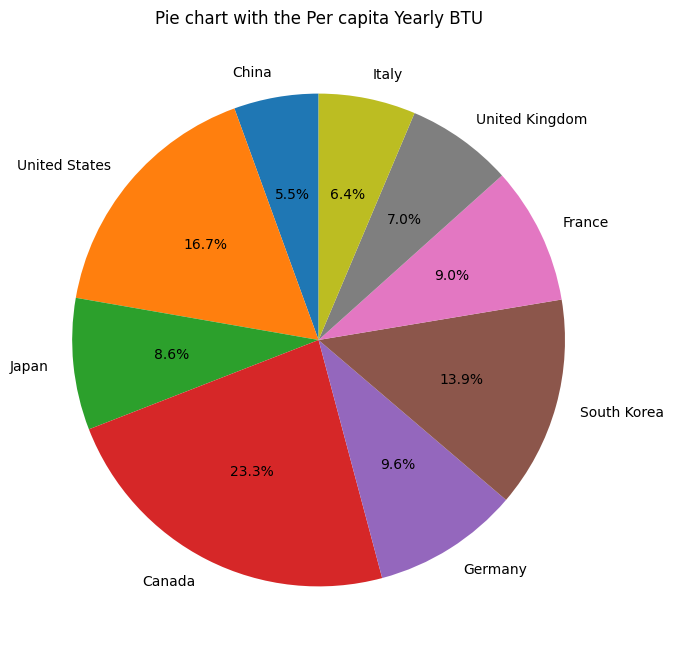

In [112]:
import matplotlib.pyplot as plt

# Solution 1
selected_countries = ['China','United States', 'Germany', 'Japan', 'France', 'United Kingdom', 'Canada', 'South Korea', 'Italy']
industry_df = df[df['Country'].isin(selected_countries)]
print("Solution 1:")
print(industry_df)

# Solution 2 - the full table
World_Share_df = df.sort_values(by="World Share", ascending=False)
print("Solution 2:")
print(World_Share_df)

# Solution 3 Which of the industry the industry countries have the best people?
total_energy_consumption_industry = industry_df['Energy Consumption  (BTU)'].sum()
total_world_share_industry = industry_df['World Share'].sum()
print("Solution 1 - Die Totale Energie der Industrielaender betraegt:")
print(total_energy_consumption_industry)
print("Solution 2 - Die Industrielaender verbrauchen soviele Prozent der gesamten Energie in Prozent:")
print(total_world_share_industry)
print("A pie-chart of the industry countries:")
industry_df.set_index('Country', inplace=True)
plt.figure(figsize=(8, 8))
industry_df['Per capita Yearly BTU'].plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Pie chart with the Per capita Yearly BTU')
plt.ylabel('')
print("Solution 3:")
plt.show()

The pie show that the people in china use less energy and the people in canada a lot.

We need to import the data, but first there are several files that we need to work. The data is separated in terms of decade. Therefore, we write a script that looks for all the files containing the data, read and combine them together into a single dataframe that we can work on.

<div class="alert alert-block alert-warning">

<b>!! INFO !!</b> END of Abgabe Teil 3.

</div>

### Data overview 

1. top genre: genre of the song

2. year: year of the song (due to re-releases, the year might not correspond to the release year of the original song)

3. bpm(beats per minute): beats per minute

4. nrgy(energy): energy of a song, the higher the value the more energetic the song is

5. dnce(danceability): the higher the value, the easier it is to dance to this song.

6. dB(loudness): the higher the value, the louder the song.

7. live(liveness): the higher the value, the more likely the song is a live recording.

8. val(valence): the higher the value, the more positive mood for the song.

9. dur(duration): the duration of the song.

10. acous(acousticness): the higher the value the more acoustic the song is.

11. spch(speechiness): the higher the value the more spoken word the song contains.

12. pop(popularity): the higher the value the more popular the song is.

##### Business Question 

Now let us formulate a business question for this project

1. What was the most popular genre in each decade?
2. Who was the most listened to artist in each decade?
2. What was the average danceability score of most recommended songs in every decade? 
3. What was the average bpm score of most recommended songs in every decade? 
4. What is the secret behind a popular song on online streaming platforms?